<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

Nama     : Rizqi Rohmatul Huda

Kelas    : TI-3C

No.Absen : 21

NIM      : 2141720264

### **D. Praktikum Filter**
1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.


b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

### **Konvulasi tanpa Library**

**Membuat fungsi konvulas**
Fungsi konvulasi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvulasi,
4. nilai pad yang akan ditambahkan pada citra



```
def convulation2d(image, kernel, stride,, padding):
```



In [ ]:
def convolution2d(image, kernel, stride, padding):
  pass

d. Load citra yang akan diproses dan diubah menjadi citra keabuan

In [3]:
img = cv.imread('/content/drive/MyDrive/img_python/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

**Menentukan kernel yang akan digunakan**

In [4]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

**Memanggil fungsi konvulasi dan menerapkan setiap filter yang telah ditentukan**

In [ ]:
convolution2d(img_gray, kernel_sharpen,1,2)

**Code fungsi konvulasi**:

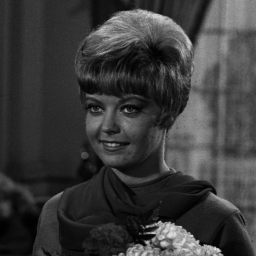

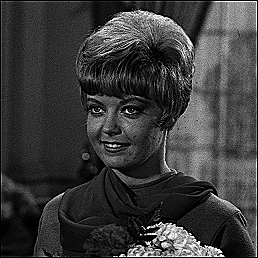

In [10]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

img_m = cv.imread('/content/drive/MyDrive/img_python/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

# Kernel untuk sharpening
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(img_gray)
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))




3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

### **Code fungsi untuk melakukan konvulasi:**

In [12]:
def convolutionImg(image, kernel, stride, padding):
  # Mengecek dimensi citra dan kernel
    if len(image.shape) != 2 or len(kernel.shape) != 2:
        raise ValueError("Citra dan kernel harus berupa matriks 2D.")

    # Mengambil dimensi citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi citra hasil konvolusi
    output_height = ((image_height + 2 * padding - kernel_height) // stride) + 1
    output_width = ((image_width + 2 * padding - kernel_width) // stride) + 1

    # Menambahkan zero-padding jika pad > 0
    padded_image = np.pad(image, padding, mode='constant')

    # Inisialisasi citra hasil konvolusi
    convolved_image = np.zeros((output_height, output_width))

    # Melakukan operasi konvolusi
    for i in range(0, output_height):
        for j in range(0, output_width):
            convolved_image[i, j] = np.sum(
                padded_image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width] * kernel)

    return convolved_image

In [50]:
# Input citra masukan
img_m = cv.imread('/content/drive/MyDrive/img_python/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)


1.  **Average Filter**

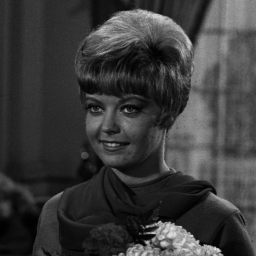

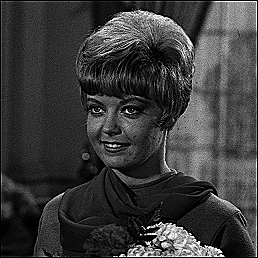

In [55]:
kernel_avg = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(img_gray)
cv2_imshow(convolutionImg(img_gray, kernel_avg, 1, 2))

2. **Low Pass Filter**

Original Gray Image


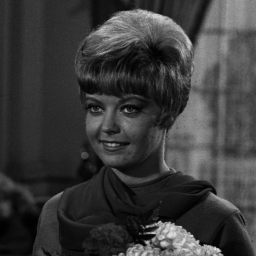

Low Pass Filter


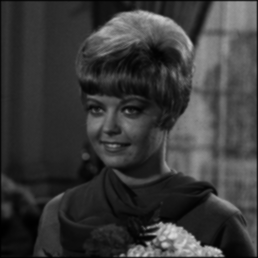

In [54]:
kernel_low = np.array([[1, 1, 1],
                            [1, 4, 1],
                            [1, 1, 1]]) / 12.0
print('Original Gray Image')
cv2_imshow(img_gray)
print('Low Pass Filter')
cv2_imshow(convolutionImg(img_gray, kernel_low, stride=1, padding=2))

3.  **High Pass Filter**

Original Gray Image


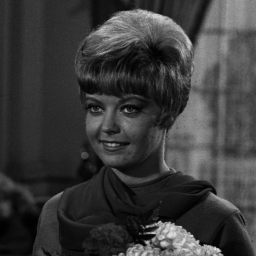

High Pass Filter


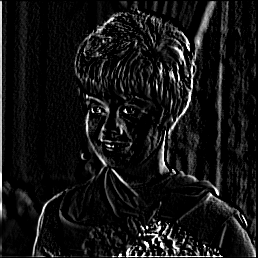

In [53]:
kernel_high = np.array([[-1, 0, 1],
                             [-1, 0, 3],
                             [-3, 0, 1]])
print('Original Gray Image')
cv2_imshow(img_gray)
print('High Pass Filter')
cv2_imshow(convolutionImg(img_gray, kernel_high, stride=1, padding=2))

4.  **Filter Sharpen**

Original Gray Image


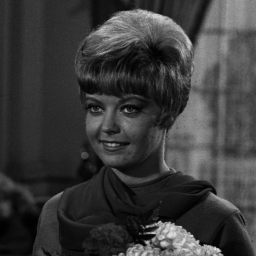

Filter Sharpen


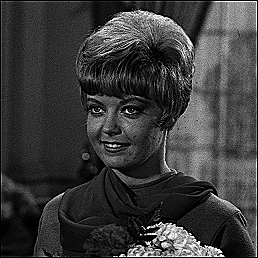

In [44]:
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
print('Original Gray Image')
cv2_imshow(img_gray)
print('Filter Sharpen')
cv2_imshow(convolutionImg(img_gray, kernel_sharpen, stride=1, padding=2))

5. **Filter Emboss**


Original Gray Image


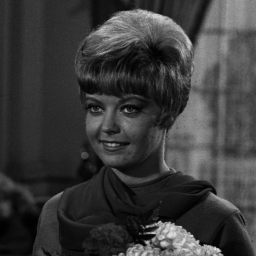

Filter Emboss


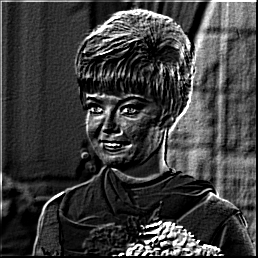

In [52]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
print('Original Gray Image')
cv2_imshow(img_gray)
print('Filter Emboss')
cv2_imshow(convolutionImg(img_gray, kernel_emboss, stride=1, padding=2))

6. **Left Sobel Edge Detection**

Original Gray Image


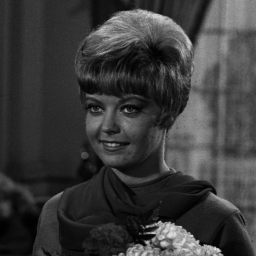

Filter Left Sobel Edge Detection


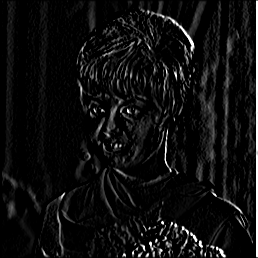

In [64]:
kernel_left = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

print('Original Gray Image')
cv2_imshow(img_gray)
print('Filter Left Sobel Edge Detection')
cv2_imshow(convolutionImg(img_gray, kernel_left, stride=1, padding=2))

7. **Canny Edge Detection**

Filter Canny Edge Detection


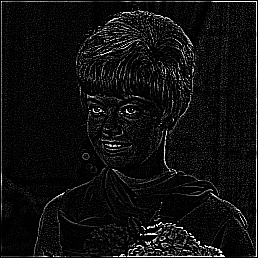

In [66]:
kernel_cannya = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])
print('Filter Canny Edge Detection')
cv2_imshow(convolutionImg(img_gray, kernel_cannya, stride=1, padding=2))

8. **Prewitt Edge Detection**